# Аналіз тональності у тексті виступу [Президента України з нагоди Дня Незалежності 2019 р.](https://www.president.gov.ua/news/vistup-prezidenta-ukrayini-pid-chas-urochistostej-z-nagodi-d-56937)

Цей аналіз містить такі **кроки**:
1. Загальна оцінка тональності за допомогою Sentializer.
2. Аналіз на лексичному рівні за допомогою Python та Тонального словника української мови (lang-uk).
2. Аналіз на морфологічному рівні за допомогою Python.

## [Sentializer](https://sentializer.pythonanywhere.com/)

Для початку визначимо довжину тексту (у знаках), адже Senializer приймає лише тексти до 5000 знаків.

In [3]:
with open("speech.txt", encoding="utf-8") as f: 
    text = f.read()
    print("\033[1mДовжина тексту:\033[0m", len(text), "знаків.")

Довжина тексту: 7836 знаків.


Розділимо текст на два рівні частини. Проаналізуємо кожну окремо.

In [6]:
midpoint = len(text) // 2
part_1 = text[:midpoint]
part_2 = text[midpoint:]
print("\033[1mЧастина 1:\033[0m", part_1[:150], "\n")
print("\033[1mЧастина 2:\033[0m", part_2[:150])

Частина 1: Дорогі українці!

Кожен мій ранок починається з sms-повідомлення.
Це sms від Генерального штабу. За минулу добу обстрілів – сім, втрат – дві. Цифри мо 

Частина 2: нашу землю прийшла війна. Яку ми зустріли всією країною.
І тут «усією країною» – це вже не просто художній прийом. Бо ми – у прямому сенсі слова – всі


Запишемо обидві частини текстів до окремих файлів, звідки їх буде зручно скопіювати.

In [8]:
with open("speech_part1.txt", "w", encoding="utf-8") as f: 
    f.write(part_1)
with open("speech_part2.txt", "w", encoding="utf-8") as f: 
    f.write(part_2)

### Аналіз частини 1
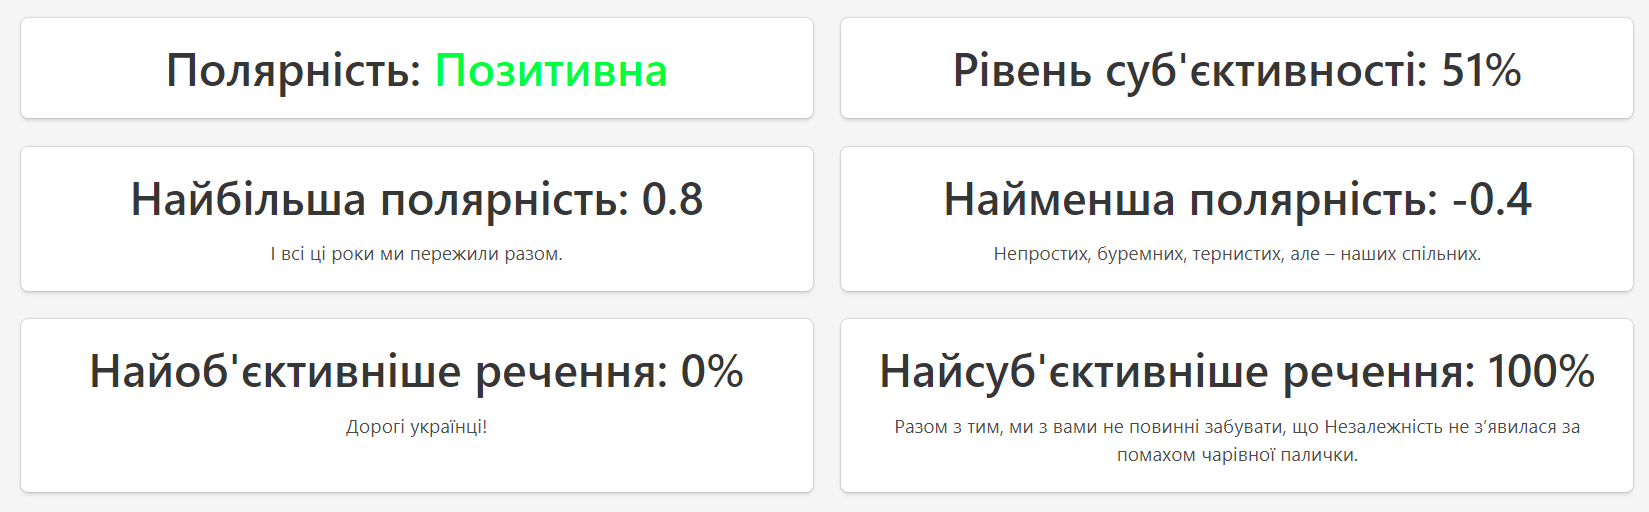

### Аналіз частини 2
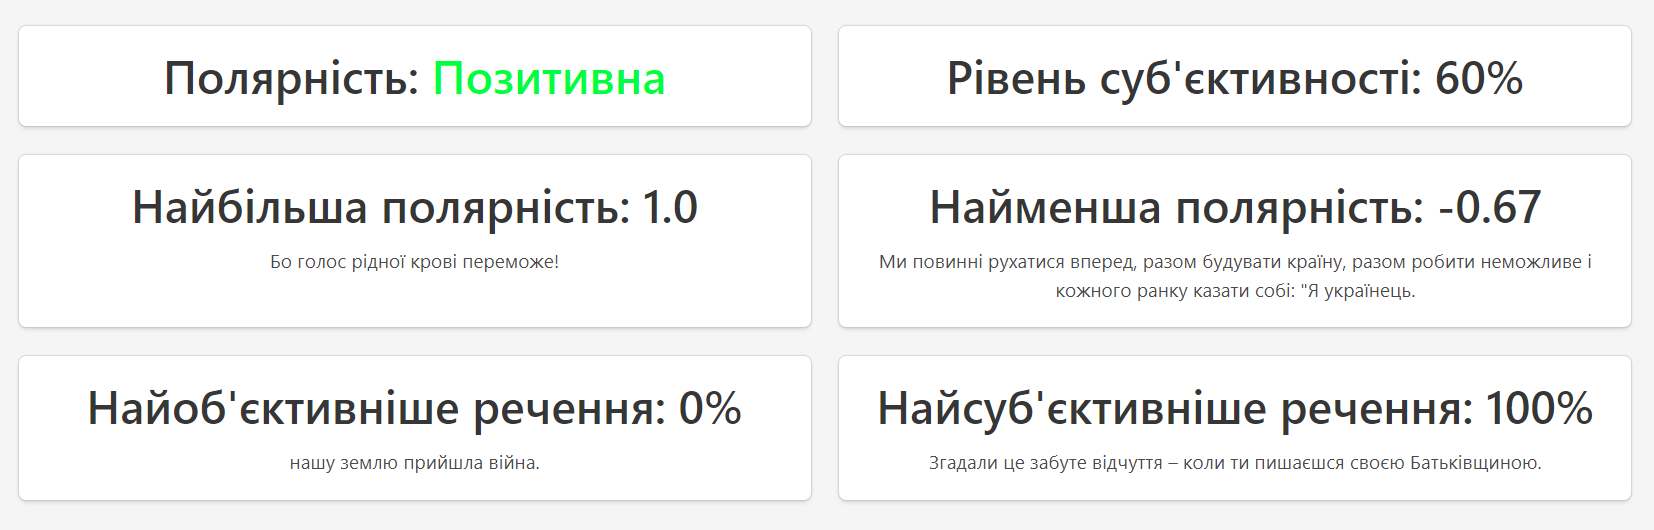

## Аналіз на лексичному рівні
Ми використовуємо Python та [Тональний словник української мови](https://github.com/lang-uk/tone-dict-uk/tree/master).

Ця частина міститиме такі кроки:
1. Лематизація 
2. Видалення стоп-слів
3. Тональна оцінка окремих речень
4. Тональна оцінка цілого тексту


Завантаження тонального словника

In [30]:
import csv

In [33]:
word_score_pairs = {}
with open("tone-dict-uk.tsv", "r", encoding="utf-8", newline='') as tsvfile:
    reader = csv.reader(tsvfile, delimiter='\t')
    for row in reader:
        if len(row) == 2:  # Ensure each row has exactly two columns
            key, value = row
            word_score_pairs[key] = value

In [36]:
print("\033[1mЕлементи у тональному словнику:\033[0m", word_score_pairs)

Елементи у тональному словнику: {'Всевишній': '1', 'Господь': '1', 'Христовий': '1', 'аборт': '-1', 'абсурд': '-1', 'абсурдний': '-1', 'абсурдно': '-1', 'аварійний': '-1', 'аварія': '-2', 'авіаудар': '-2', 'автентичний': '1', 'автомат': '-1', 'автоматний': '-2', 'авторитетний': '1', 'агітка': '-1', 'агонія': '-1', 'агресія': '-1', 'агресивний': '-1', 'адаптований': '1', 'адекватний': '1', 'адекватно': '1', 'ажурний': '1', 'акторський': '1', 'акуратний': '1', 'алкаш': '-2', 'алкоголізм': '-1', 'алогічний': '-1', 'альтруїстичний': '1', 'амбітний': '1', 'амбіція': '1', 'амністія': '1', 'аморальний': '-1', 'аморфний': '-1', 'ангельський': '1', 'аномальний': '-1', 'анти': '-1', 'антиамериканський': '-1', 'антигромадський': '-1', 'антигуманний': '-1', 'антидержавний': '-2', 'антиконституційний': '-1', 'антинаркотичний': '1', 'антинародний': '-1', 'антинауковий': '-1', 'антирадянський': '-1', 'антисанітарний': '-1', 'антисеміт': '-1', 'антисемітський': '-2', 'антисоціальний': '-1', 'антитерор

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

In [26]:
sentences = sent_tokenize(text)
print("\033[1mПерші 5 речень:\033[0m")
for s in sentences[:5]:
    print(s, "\n")

Перші 5 речень:
Дорогі українці! 

Кожен мій ранок починається з sms-повідомлення. 

Це sms від Генерального штабу. 

За минулу добу обстрілів – сім, втрат – дві. 

Цифри можуть бути різними, але тільки одна робить ранок добрим. 



Кожне речення розбиваємо на слова. Кожне слово лематизуємо та замінюємо на оцінку з тонального словника, попередньо видаливши стоп-слова.

У тональному словнику відсутні слова з нейтральним значенням. У ньому є лише негативні значення (-2, -1) або позитивні значення (1, 2). Отже, якщо слово відсутнє у словнику, ми надаємо йому оцінку 0.

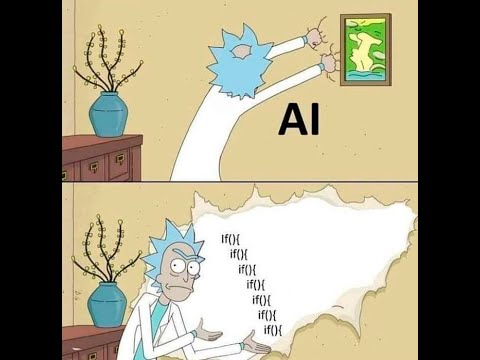

In [29]:
# модуль для лематизації українських слів
import spacy
nlp = spacy.load("uk_core_news_sm")

In [39]:
sent_with_wordscores = []
for sent in sentences: 
    words = sent.split()
    sent_scores = []
    for word in words: 
        nlp_word = nlp(word)[0]
        if not nlp_word.is_stop: 
            lemmatized_word = nlp_word.lemma_
            if lemmatized_word not in word_score_pairs: 
                sent_scores.append(0)
            else: 
                sent_scores.append(word_score_pairs[lemmatized_word])
    sent_with_wordscores.append(sent_scores)
            

In [41]:
print("\033[1mОцінки окремих слів у кожному реченні\033[0m")
for s, original_s in zip(sent_with_wordscores[:5], sentences[:5]): 
    print(s, original_s)

Оцінки окремих слів у кожному реченні
['1', 0] Дорогі українці!
[0, 0, 0] Кожен мій ранок починається з sms-повідомлення.
[0, 0, 0] Це sms від Генерального штабу.
[0, 0, '-2', 0, '-1', 0] За минулу добу обстрілів – сім, втрат – дві.
[0, 0, 0, 0, 0, '2'] Цифри можуть бути різними, але тільки одна робить ранок добрим.


Середня оцінка для кожного речення 

In [44]:
sent_scores = []
for s in sent_with_wordscores: 
    try:
        sent_average = sum([float(score) for score in s]) / len(s)
        sent_scores.append(sent_average)
    except ZeroDivisionError: sent_scores.append(0)

In [46]:
print("\033[1mОцінки окремих речень:\033[0m", sent_scores[:5])

Оцінки окремих речень: [0.5, 0.0, 0.0, -0.5, 0.3333333333333333]


Загальна оцінка тексту

In [47]:
text_average = sum(sent_scores) / len(sent_scores)

In [48]:
print("\033[1mОцінка для всього тексту:\033[0m", text_average)

Оцінка для всього тексту: 0.03358118798259643


## Морфологічний рівень

Слова з не-

In [51]:
negatives = [w for w in text.lower().split() if w.startswith("не") and w != "не"]
print("\033[1mІмовірні слова із заперечним значенням:\033[0m")
for w in negatives: 
    print(w)

Імовірні слова із заперечним значенням:
небом.
незалежності.
незалежність.
незалежній
незалежність
неї
неповний
незалежності.
неминучим.
незалежності
непростих,
непрості,
небесною.
немає.
неповноцінні,
неповна.
незалежно
неможливе
неповторна,
незламна,
неймовірна,
незалежності.
незалежність
неважливі.


Слова з демінутивними суфіксами

In [54]:
suffixes = ["еньк", "оньк", "ушк", "очк", "ечк", "ичк"]
deminutives = [w for w in text.lower().split() if any(suffix in w for suffix in suffixes)]
print("\033[1mІмовірні слова з демінутивними суфіксами:\033[0m")
for w in deminutives: 
    print(w)

Імовірні слова з демінутивними суфіксами:
палички.
сонечком.


Префікси анти-, архі-, без-

In [56]:
prefixes = ["анти", "архі", "без"]
selected_words = [w for w in text.lower().split() if any(w.startswith(pref) for pref in prefixes)]
print("\033[1mІмовірні слова з префіксами анти-, архі-, без-:\033[0m")
for w in selected_words: 
    print(w)

Імовірні слова з префіксами анти-, архі-, без-:
безтурботні.


Інтенсифікатори

In [63]:
intensifiers = [
    'дуже',
    'надто',
    'особливо',
    'вельми',
    'надзвичайно',
    'трошки',
    'трішечки',
    'не дуже',
    'слабо',
    'ледве',
    'багато',
    'стільки',
    'безліч',
    'мало',
    'кілька',
    'найбільш',
    'найменш',
    "тільки",
    "лише",
    "набагато"
]

In [64]:
sents_with_intensifiers = []
for sent in sentences: 
    for w in sent.lower().split():
        if w in intensifiers: 
            sents_with_intensifiers.append(sent)

In [65]:
print("\033[1mРечення з інтенсифікаторами:\033[0m")
for s in sents_with_intensifiers: 
    print(s)

Речення з інтенсифікаторами:
Цифри можуть бути різними, але тільки одна робить ранок добрим.
Це – лише декілька важливих подій яскравої історії нашої багатовікової та, водночас, молодої країни.
Вони мислять інакше, вони думають сучасно, а значить – Україна рухатиметься тільки вперед.
Новин, де решта слів втрачала сенс, а перед очима були тільки назви населених пунктів та кількість загиблих героїв.
І для тих, хто не розуміє сьогоднішній біль українців, я поясню дуже доступною мовою.
Мусимо бути єдині, бо тільки тоді – ми сильні.
Зрозуміти, що розраховувати маємо тільки на себе.
